# Multi Variate Analysis 
This jupyter python notebook conducts multi variate analysis relevant to the research question. The research questions is as follows: <br>
<br>
How different variables such as **actual delivery time**, **the difference between actual and estimated wait time**, **freight value**, **payment value**, **payment installment** affect the **review score** in each of the different **product type categories**, `Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`? <br>

### Analysis of response variable, review score
In summary (from part 1), review comments are unstructured data and are not available for all data points. Hence, review comments are not used to predict review score. 

Review Score is an imbalanced type of data. Hence, it is important to balance them. 

### Analysis of predictor variables
In summary (from part 1), **order status** affects review score significantly. 

In summary (from part 2), estimated delivery time does not affect review score. Payment time also does not affect the review score. However, **actual wait time** and the **difference between actual and estimated wait time** does affect the review score although not in a linear way. 

In summary (from part 3), freight value allows review score to be slgihtly distinguished between review score 1 & 2 from review score 3, 4, & 5. This relationship is not a strong linear correlation. Part 3 also helps to analyse by product type. From part 3, review scores did not change much between the top ten product category types. Hence, it does not require further cleaning. However, when predicting how review score is affected based on  **actual delivery time**, **the difference between actual and estimated wait time**, **order status**, **freight value**, **payment value** and **payment installments**, it is important to distinguish the categories. As sellers may be interested to know how review scores are affected for each product category. However, within the scope of this project only product types that remained within top ten will be analysed. 

In summary (from part 4), payment mode does affect the review score. A not defined payment mode has the lowest review score. However, this is because this category was not delivered at all. The other categories are the same in terms of review score distribution. Payment Value is significant in predicting review score, especially between review scores 1&2 from review scores 3,4,5. Payment installments is good in predicting between Review score 1 and review score 3,4,5. 

### Extracting the necessary CSVs provided

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

### Merging the Datasets

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_payments_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_items_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_products_dataset, on="product_id", how = 'left')

### Removing Duplicates and extracting needed variables 

In [4]:
olist_merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)

In [5]:
olist_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99650 non-null  object 
 1   customer_id                    99650 non-null  object 
 2   order_status                   99650 non-null  object 
 3   order_purchase_timestamp       99650 non-null  object 
 4   order_approved_at              99490 non-null  object 
 5   order_delivered_carrier_date   97860 non-null  object 
 6   order_delivered_customer_date  96672 non-null  object 
 7   order_estimated_delivery_date  99650 non-null  object 
 8   review_id                      99650 non-null  object 
 9   review_score                   99650 non-null  int64  
 10  review_comment_title           11704 non-null  object 
 11  review_comment_message         41646 non-null  object 
 12  review_creation_date           99650 non-null

In [6]:
dataAnalysis = pd.DataFrame(olist_merge[['order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score', 'payment_installments', 'payment_value', 'freight_value', 'product_category_name']])

In [7]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   99650 non-null  object 
 1   order_purchase_timestamp       99650 non-null  object 
 2   order_approved_at              99490 non-null  object 
 3   order_delivered_customer_date  96672 non-null  object 
 4   order_estimated_delivery_date  99650 non-null  object 
 5   review_score                   99650 non-null  int64  
 6   payment_installments           99649 non-null  float64
 7   payment_value                  99649 non-null  float64
 8   freight_value                  98874 non-null  float64
 9   product_category_name          97454 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [8]:
# Creating a list of the time related variables 
time = ["order_purchase_timestamp","order_estimated_delivery_date","order_delivered_customer_date", "order_approved_at"]
# Changing the time related variables to datetime format using the list 
for column in time:
    dataAnalysis.loc[:, column] = pd.to_datetime(dataAnalysis[column])

In [9]:
# Calculating the actual wait time    
dataAnalysis.loc[:,"actual_wait_time"] = (dataAnalysis['order_delivered_customer_date']-dataAnalysis['order_purchase_timestamp']).dt.days

In [10]:
# Calculating the estimated wait time 
dataAnalysis.loc[:,"estimated_wait_time"] = (dataAnalysis['order_estimated_delivery_date']-dataAnalysis['order_purchase_timestamp']).dt.days

In [11]:
#Actual minus estimated wait time 
dataAnalysis.loc[:,"actualxestimated"] = (dataAnalysis['actual_wait_time']-dataAnalysis['estimated_wait_time'])

In [12]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_status                   99650 non-null  object        
 1   order_purchase_timestamp       99650 non-null  datetime64[ns]
 2   order_approved_at              99490 non-null  datetime64[ns]
 3   order_delivered_customer_date  96672 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99650 non-null  datetime64[ns]
 5   review_score                   99650 non-null  int64         
 6   payment_installments           99649 non-null  float64       
 7   payment_value                  99649 non-null  float64       
 8   freight_value                  98874 non-null  float64       
 9   product_category_name          97454 non-null  object        
 10  actual_wait_time               96672 non-null  float64       
 11  estimated_wait

In [13]:
dataAnalysis.drop(columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'estimated_wait_time'], inplace = True)

In [14]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99650 entries, 0 to 119150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_status           99650 non-null  object 
 1   review_score           99650 non-null  int64  
 2   payment_installments   99649 non-null  float64
 3   payment_value          99649 non-null  float64
 4   freight_value          98874 non-null  float64
 5   product_category_name  97454 non-null  object 
 6   actual_wait_time       96672 non-null  float64
 7   actualxestimated       96672 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.8+ MB


### Further analysis of predictors
Numerical types: payment installments, payment value, freight value, actual wait time, actualxestimated 

So when using multi variate, it is important to know which is categorical and which is numerical. 

The numerical types are dependent on the order status being delivered. Hence, it needs to be filtered. 

In [15]:
#
dataAnalysis = dataAnalysis.loc[(dataAnalysis["order_status"]=="delivered")]

In [16]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 119150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_status           96674 non-null  object 
 1   review_score           96674 non-null  int64  
 2   payment_installments   96673 non-null  float64
 3   payment_value          96673 non-null  float64
 4   freight_value          96674 non-null  float64
 5   product_category_name  95312 non-null  object 
 6   actual_wait_time       96666 non-null  float64
 7   actualxestimated       96666 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.6+ MB


### Class balancing for review score into low and high review score 
Review score 1 to 3 classified as low (0) <br>
Review score 4 and 5 classified as high (1)

This is to reduce the class imbalance seen. 

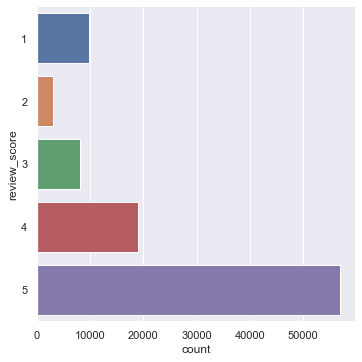

In [17]:
sb.catplot(y = "review_score", data = dataAnalysis, kind = "count")

From the above graph, the review score of 5 is significantly in larger numbers than the other review score. 
The review score is floor divided by 4. This is because 
0//3 = 0 
1//3 = 0
2//3 = 0
3//3 = 1
4//3 = 1
5//3 = 1
This allows us to not use a if statement which can help reduce time complexity. 

The splitting ws decided based on the exploratory data analysis done earlier. 

In [18]:
# Calculating the actual wait time    
dataAnalysis.loc[:,"reviewscore"] = dataAnalysis["review_score"]//3

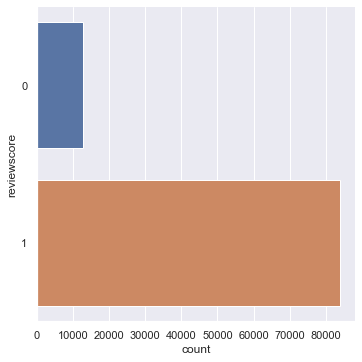

In [19]:
sb.catplot(y = "reviewscore", data = dataAnalysis, kind = "count")

In [20]:
dataAnalysis.drop(columns = ['review_score'], inplace = True)

In [21]:
def balancing(dataframe):
    # Class count
    review_class_1, review_class_0 = dataframe.reviewscore.value_counts()

    # Divide by class
    df_review_0 = dataframe[dataframe['reviewscore'] == 0]
    df_review_1 = dataframe[dataframe['reviewscore'] == 1]

    df_review_0_over = df_review_0.sample(review_class_1, replace=True)
    dataframe = pd.concat([df_review_1, df_review_0_over], axis=0)
    return dataframe

#### Next, narrowing down to the top ten products
`Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`

In [22]:
#merging with english name first 
dataAnalysis = pd.merge(dataAnalysis,product_category_name_translation,how="left",on="product_category_name")

In [23]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96674 entries, 0 to 96673
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   96674 non-null  object 
 1   payment_installments           96673 non-null  float64
 2   payment_value                  96673 non-null  float64
 3   freight_value                  96674 non-null  float64
 4   product_category_name          95312 non-null  object 
 5   actual_wait_time               96666 non-null  float64
 6   actualxestimated               96666 non-null  float64
 7   reviewscore                    96674 non-null  int64  
 8   product_category_name_english  95293 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 7.4+ MB


In [24]:
# No further cleaning required 
housewareProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="housewares")]
housewareProd = balancing(housewareProd)
housewareProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10024 entries, 0 to 36798
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   10024 non-null  object 
 1   payment_installments           10024 non-null  float64
 2   payment_value                  10024 non-null  float64
 3   freight_value                  10024 non-null  float64
 4   product_category_name          10024 non-null  object 
 5   actual_wait_time               10024 non-null  float64
 6   actualxestimated               10024 non-null  float64
 7   reviewscore                    10024 non-null  int64  
 8   product_category_name_english  10024 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 783.1+ KB


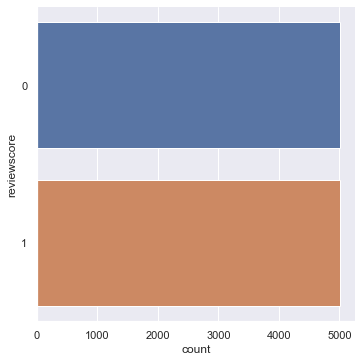

In [25]:
sb.catplot(y = "reviewscore", data = housewareProd, kind = "count")

In [26]:
autoProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="auto")]
autoProd=balancing(autoProd)
autoProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6596 entries, 2 to 19358
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6596 non-null   object 
 1   payment_installments           6596 non-null   float64
 2   payment_value                  6596 non-null   float64
 3   freight_value                  6596 non-null   float64
 4   product_category_name          6596 non-null   object 
 5   actual_wait_time               6595 non-null   float64
 6   actualxestimated               6595 non-null   float64
 7   reviewscore                    6596 non-null   int64  
 8   product_category_name_english  6596 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 515.3+ KB


In [27]:
#Needs cleaning and removal of null values 
autoProd = autoProd.loc[(autoProd["actual_wait_time"].notnull())]
autoProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6595 entries, 2 to 19358
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   6595 non-null   object 
 1   payment_installments           6595 non-null   float64
 2   payment_value                  6595 non-null   float64
 3   freight_value                  6595 non-null   float64
 4   product_category_name          6595 non-null   object 
 5   actual_wait_time               6595 non-null   float64
 6   actualxestimated               6595 non-null   float64
 7   reviewscore                    6595 non-null   int64  
 8   product_category_name_english  6595 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 515.2+ KB


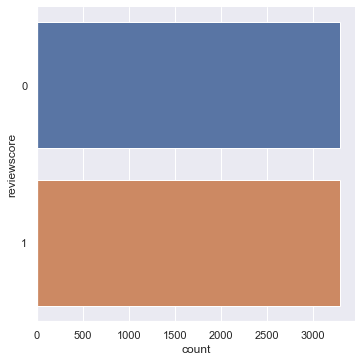

In [28]:
sb.catplot(y = "reviewscore", data = autoProd, kind = "count")

In [29]:
#No need further cleaning
furnitureProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="furniture_decor")]
furnitureProd = balancing(furnitureProd)
furnitureProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10550 entries, 31 to 23441
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   10550 non-null  object 
 1   payment_installments           10550 non-null  float64
 2   payment_value                  10550 non-null  float64
 3   freight_value                  10550 non-null  float64
 4   product_category_name          10550 non-null  object 
 5   actual_wait_time               10550 non-null  float64
 6   actualxestimated               10550 non-null  float64
 7   reviewscore                    10550 non-null  int64  
 8   product_category_name_english  10550 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 824.2+ KB


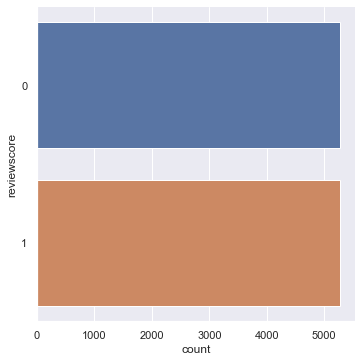

In [30]:
sb.catplot(y = "reviewscore", data = furnitureProd, kind = "count")

In [31]:
CompAcProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="computers_accessories")]
CompAcProd=balancing(CompAcProd)
CompAcProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11118 entries, 10 to 84256
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   11118 non-null  object 
 1   payment_installments           11118 non-null  float64
 2   payment_value                  11118 non-null  float64
 3   freight_value                  11118 non-null  float64
 4   product_category_name          11118 non-null  object 
 5   actual_wait_time               11116 non-null  float64
 6   actualxestimated               11116 non-null  float64
 7   reviewscore                    11118 non-null  int64  
 8   product_category_name_english  11118 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 868.6+ KB


In [32]:
#Needs cleaning and removal of null values 
CompAcProd = CompAcProd.loc[(CompAcProd["actual_wait_time"].notnull())]
CompAcProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11116 entries, 10 to 84256
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   11116 non-null  object 
 1   payment_installments           11116 non-null  float64
 2   payment_value                  11116 non-null  float64
 3   freight_value                  11116 non-null  float64
 4   product_category_name          11116 non-null  object 
 5   actual_wait_time               11116 non-null  float64
 6   actualxestimated               11116 non-null  float64
 7   reviewscore                    11116 non-null  int64  
 8   product_category_name_english  11116 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 868.4+ KB


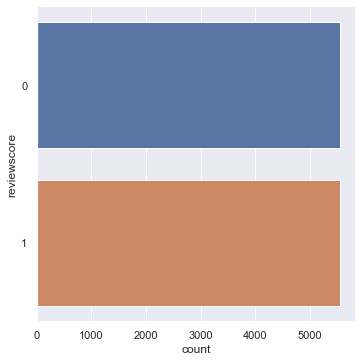

In [33]:
sb.catplot(y = "reviewscore", data = CompAcProd, kind = "count")

In [34]:
healthProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="health_beauty")]
healthProd=balancing(healthProd)
healthProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15246 entries, 20 to 82180
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   15246 non-null  object 
 1   payment_installments           15241 non-null  float64
 2   payment_value                  15241 non-null  float64
 3   freight_value                  15246 non-null  float64
 4   product_category_name          15246 non-null  object 
 5   actual_wait_time               15246 non-null  float64
 6   actualxestimated               15246 non-null  float64
 7   reviewscore                    15246 non-null  int64  
 8   product_category_name_english  15246 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.2+ MB


In [35]:
#Needs further cleaning 
healthProd = healthProd.loc[(healthProd["payment_installments"].notnull())]
healthProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15241 entries, 20 to 82180
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   15241 non-null  object 
 1   payment_installments           15241 non-null  float64
 2   payment_value                  15241 non-null  float64
 3   freight_value                  15241 non-null  float64
 4   product_category_name          15241 non-null  object 
 5   actual_wait_time               15241 non-null  float64
 6   actualxestimated               15241 non-null  float64
 7   reviewscore                    15241 non-null  int64  
 8   product_category_name_english  15241 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.2+ MB


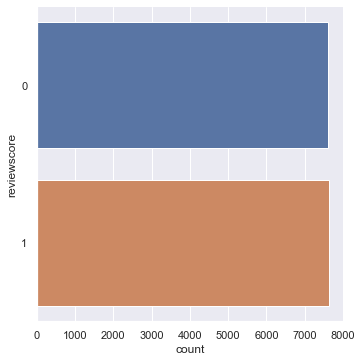

In [36]:
sb.catplot(y = "reviewscore", data = healthProd, kind = "count")

In [37]:
sportsProd = dataAnalysis.loc[(dataAnalysis["product_category_name_english"]=="sports_leisure")]
sportsProd=balancing(sportsProd)
sportsProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13276 entries, 41 to 81870
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   13276 non-null  object 
 1   payment_installments           13276 non-null  float64
 2   payment_value                  13276 non-null  float64
 3   freight_value                  13276 non-null  float64
 4   product_category_name          13276 non-null  object 
 5   actual_wait_time               13275 non-null  float64
 6   actualxestimated               13275 non-null  float64
 7   reviewscore                    13276 non-null  int64  
 8   product_category_name_english  13276 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


In [38]:
#Needs further cleaning 
sportsProd = sportsProd.loc[(sportsProd["actual_wait_time"].notnull())]
sportsProd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13275 entries, 41 to 81870
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   13275 non-null  object 
 1   payment_installments           13275 non-null  float64
 2   payment_value                  13275 non-null  float64
 3   freight_value                  13275 non-null  float64
 4   product_category_name          13275 non-null  object 
 5   actual_wait_time               13275 non-null  float64
 6   actualxestimated               13275 non-null  float64
 7   reviewscore                    13275 non-null  int64  
 8   product_category_name_english  13275 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.0+ MB


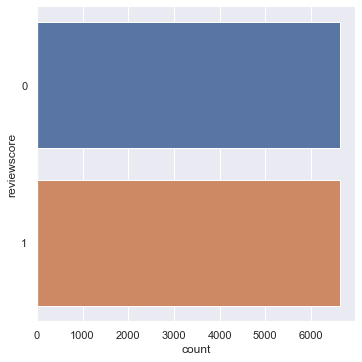

In [39]:
sb.catplot(y = "reviewscore", data = sportsProd, kind = "count")

#### Multivariate analysis  on the product types 
`Houseware`, `auto`, `furniture decor`, `computer accessories`, `health beauty`, `sports leisure`

As mentioned in part 3, as different product types have different characteristics, the variables affect the review scores differently. These differences are illustrated in the boxplots below.

In [40]:
newDF = housewareProd.append(autoProd)
newDF = newDF.append(furnitureProd)
newDF = newDF.append(CompAcProd)
newDF = newDF.append(healthProd)
newDF = newDF.append(sportsProd)

In [41]:
newDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66801 entries, 0 to 81870
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   66801 non-null  object 
 1   payment_installments           66801 non-null  float64
 2   payment_value                  66801 non-null  float64
 3   freight_value                  66801 non-null  float64
 4   product_category_name          66801 non-null  object 
 5   actual_wait_time               66801 non-null  float64
 6   actualxestimated               66801 non-null  float64
 7   reviewscore                    66801 non-null  int64  
 8   product_category_name_english  66801 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 5.1+ MB


<AxesSubplot:xlabel='payment_installments', ylabel='product_category_name_english'>

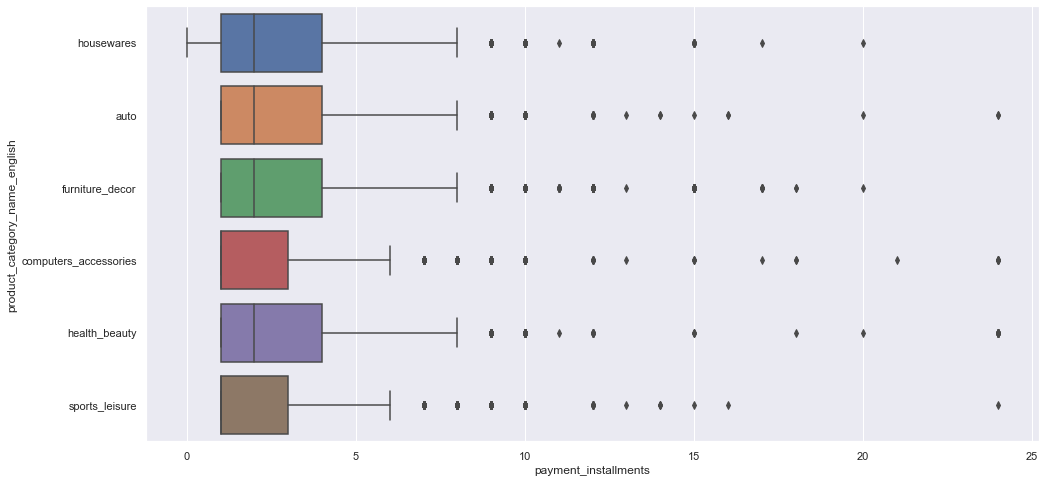

In [42]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'payment_installments', y = 'product_category_name_english', data = newDF)

<AxesSubplot:xlabel='freight_value', ylabel='product_category_name_english'>

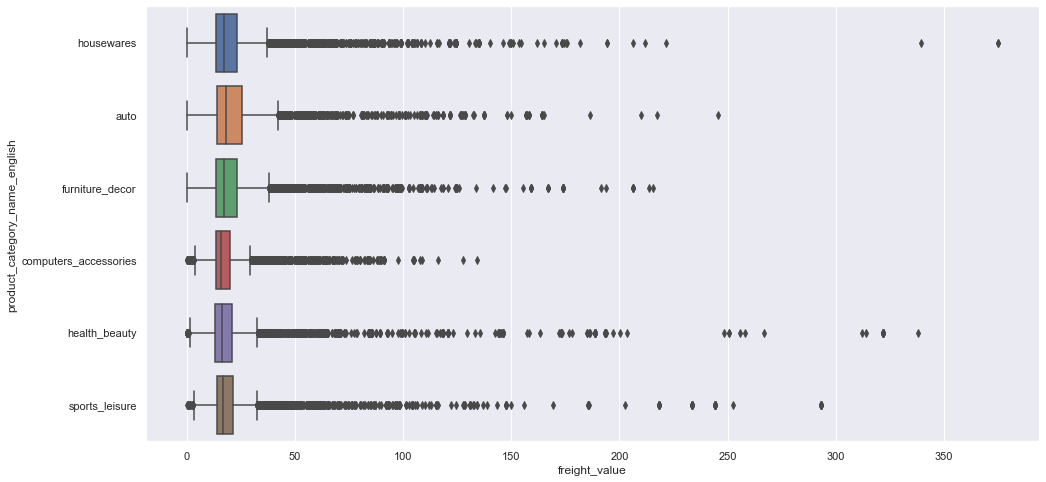

In [43]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'freight_value', y = 'product_category_name_english', data = newDF)

<AxesSubplot:xlabel='payment_value', ylabel='product_category_name_english'>

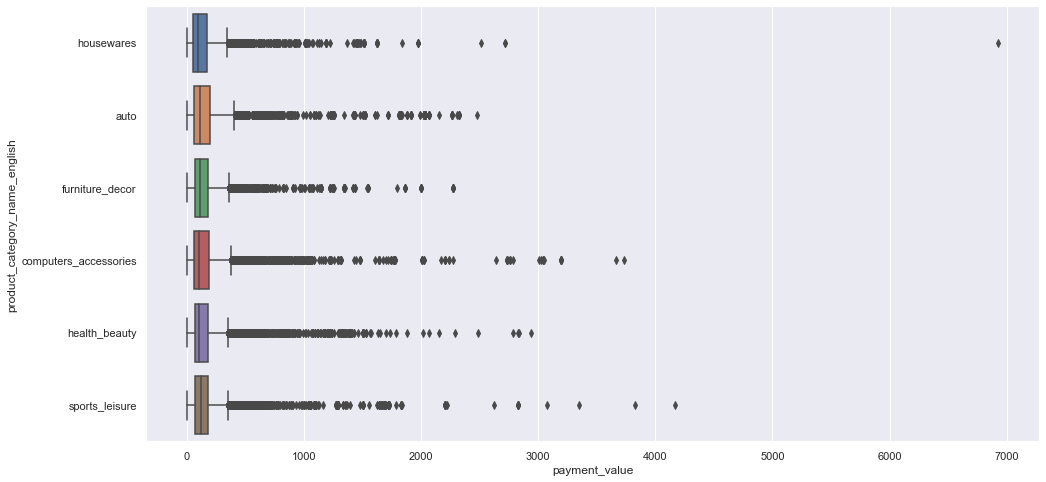

In [44]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'payment_value', y = 'product_category_name_english', data = newDF)

<AxesSubplot:xlabel='actualxestimated', ylabel='product_category_name_english'>

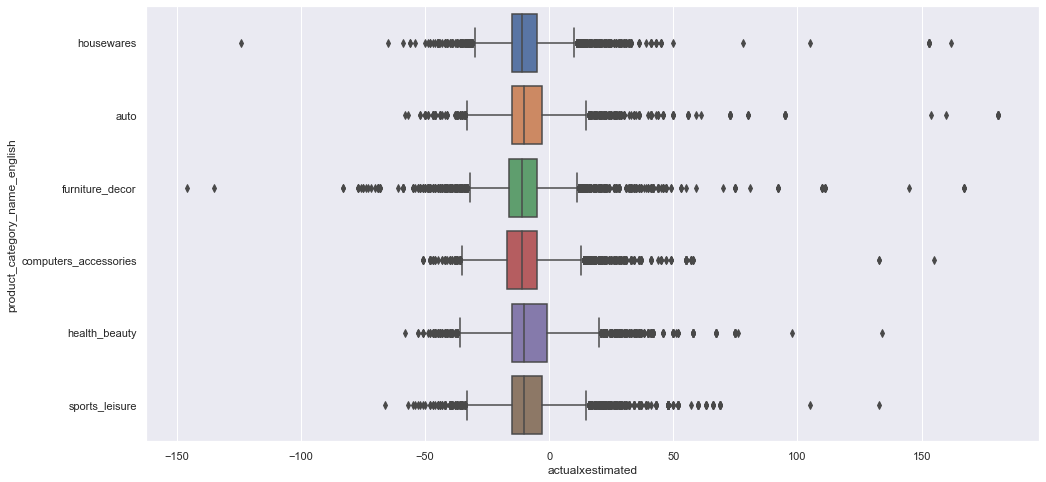

In [45]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'actualxestimated', y = 'product_category_name_english', data = newDF)

# Bivariate Analysis of Variables against Reclassified Review Score
Each of the below shows graphs depicting predictor variables against the two classes of raview score 0 and 1. 
This is to visualise the difference between review score 0 and review score 1

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

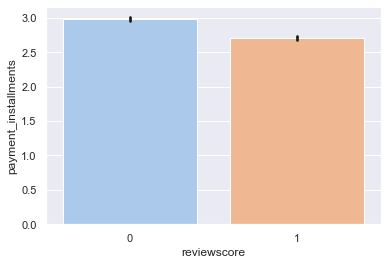

In [46]:
sb.barplot(x='reviewscore', y='payment_installments', data=newDF, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

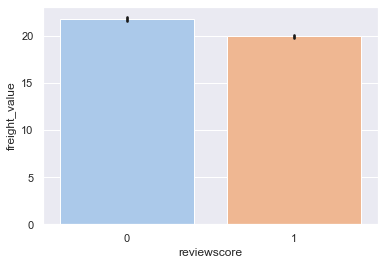

In [47]:
sb.barplot(x='reviewscore', y='freight_value', data=newDF, palette ="pastel" , errcolor='k')

The above graph supports why we did reclasification of review scores, following from the Exploratory Data Analysis in Part 1 to 4.

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

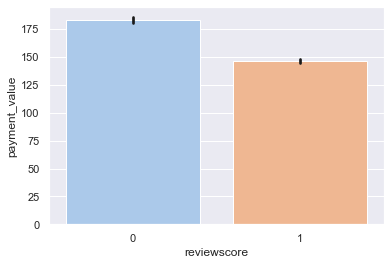

In [48]:
sb.barplot(x='reviewscore', y='payment_value', data=newDF, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

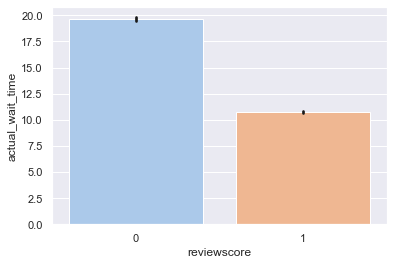

In [49]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=newDF, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

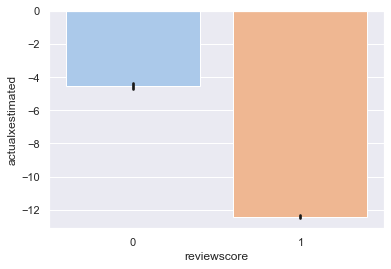

In [50]:
sb.barplot(x='reviewscore', y='actualxestimated', data=newDF, palette ="pastel" , errcolor='k')

# Bivariate Analysis of Variables against Reclassified Review Score according to product type

## Houseware Products

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

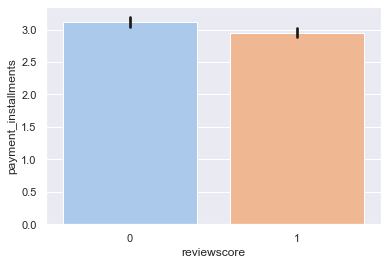

In [51]:
sb.barplot(x='reviewscore', y='payment_installments', data=housewareProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

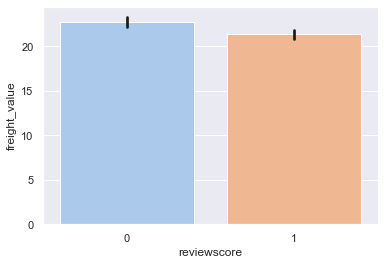

In [52]:
sb.barplot(x='reviewscore', y='freight_value', data=housewareProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

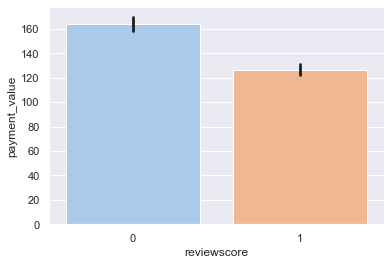

In [53]:
sb.barplot(x='reviewscore', y='payment_value', data=housewareProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

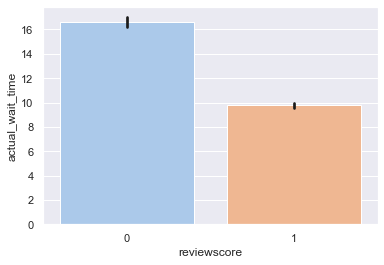

In [54]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=housewareProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

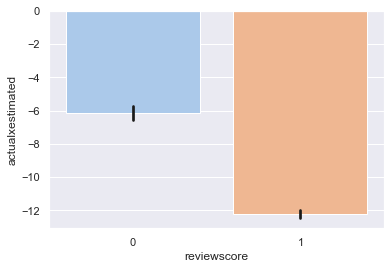

In [55]:
sb.barplot(x='reviewscore', y='actualxestimated', data=housewareProd, palette ="pastel" , errcolor='k')

## Auto Products

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

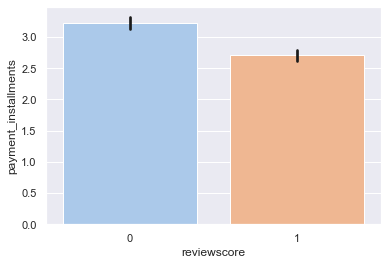

In [56]:
sb.barplot(x='reviewscore', y='payment_installments', data=autoProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

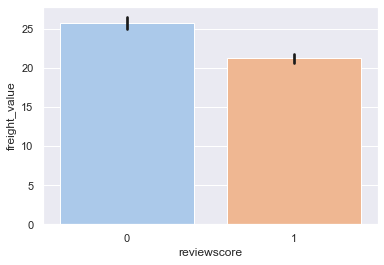

In [57]:
sb.barplot(x='reviewscore', y='freight_value', data=autoProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

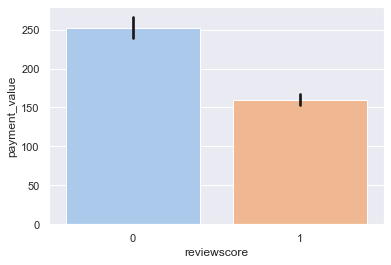

In [58]:
sb.barplot(x='reviewscore', y='payment_value', data=autoProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

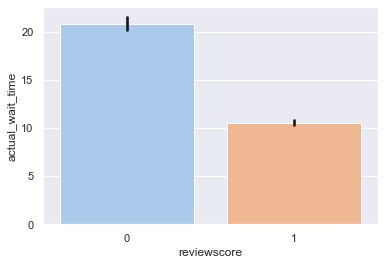

In [59]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=autoProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

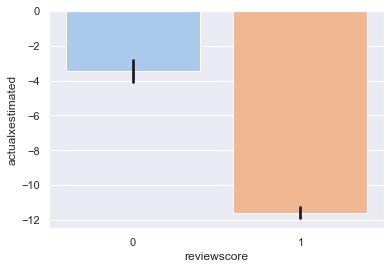

In [60]:
sb.barplot(x='reviewscore', y='actualxestimated', data=autoProd, palette ="pastel" , errcolor='k')

## Furniture Products

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

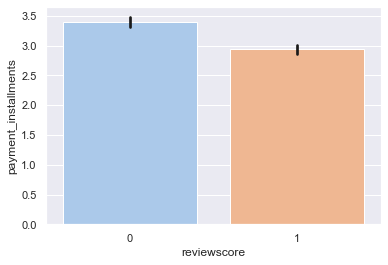

In [61]:
sb.barplot(x='reviewscore', y='payment_installments', data=furnitureProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

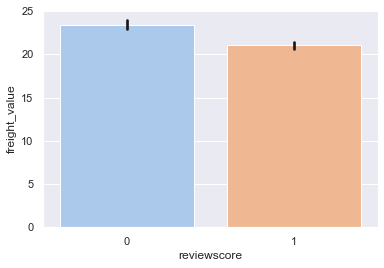

In [62]:
sb.barplot(x='reviewscore', y='freight_value', data=furnitureProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

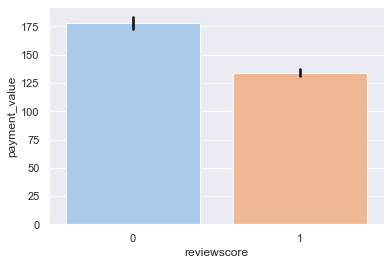

In [63]:
sb.barplot(x='reviewscore', y='payment_value', data=furnitureProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

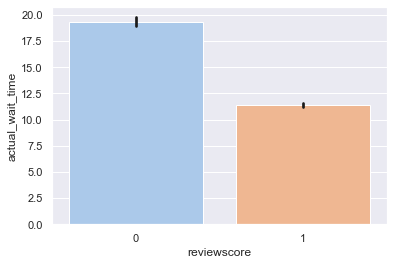

In [64]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=furnitureProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

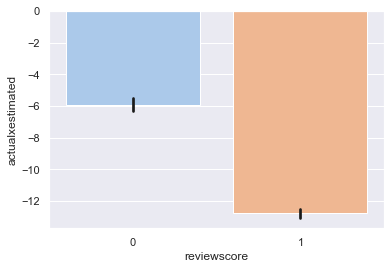

In [65]:
sb.barplot(x='reviewscore', y='actualxestimated', data=furnitureProd, palette ="pastel" , errcolor='k')

## Computer Accessories

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

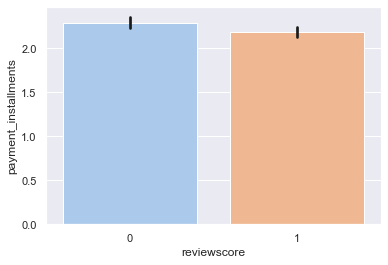

In [66]:
sb.barplot(x='reviewscore', y='payment_installments', data=CompAcProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

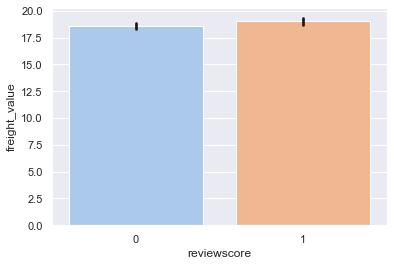

In [67]:
sb.barplot(x='reviewscore', y='freight_value', data=CompAcProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

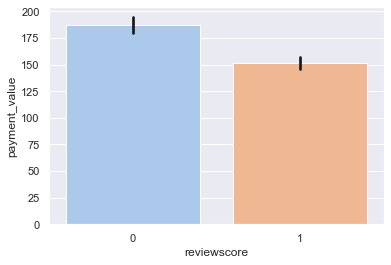

In [68]:
sb.barplot(x='reviewscore', y='payment_value', data=CompAcProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

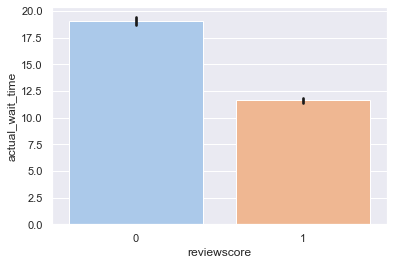

In [69]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=CompAcProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

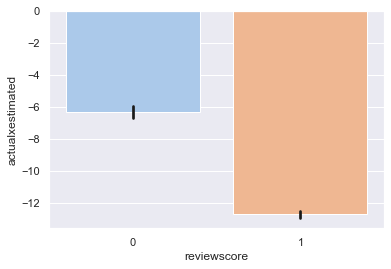

In [70]:
sb.barplot(x='reviewscore', y='actualxestimated', data=CompAcProd, palette ="pastel" , errcolor='k')

## Health Products

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

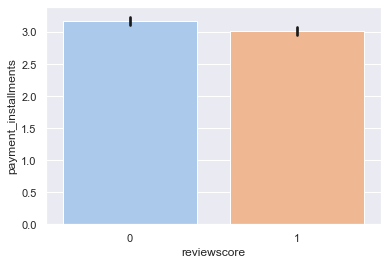

In [71]:
sb.barplot(x='reviewscore', y='payment_installments', data=healthProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

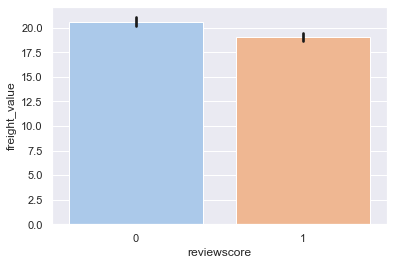

In [72]:
sb.barplot(x='reviewscore', y='freight_value', data=healthProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

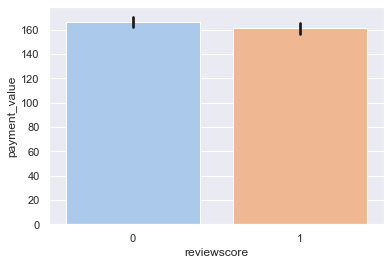

In [73]:
sb.barplot(x='reviewscore', y='payment_value', data=healthProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

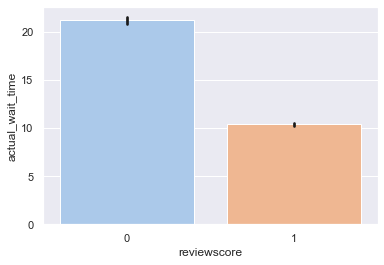

In [74]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=healthProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

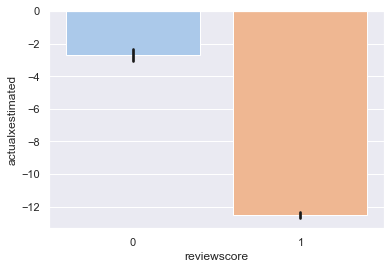

In [75]:
sb.barplot(x='reviewscore', y='actualxestimated', data=healthProd, palette ="pastel" , errcolor='k')

## Sports Products

<AxesSubplot:xlabel='reviewscore', ylabel='payment_installments'>

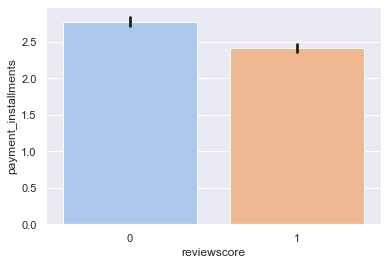

In [76]:
sb.barplot(x='reviewscore', y='payment_installments', data=sportsProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='freight_value'>

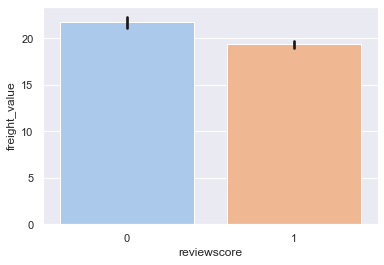

In [77]:
sb.barplot(x='reviewscore', y='freight_value', data=sportsProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='payment_value'>

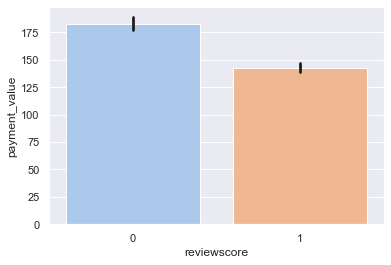

In [78]:
sb.barplot(x='reviewscore', y='payment_value', data=sportsProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actual_wait_time'>

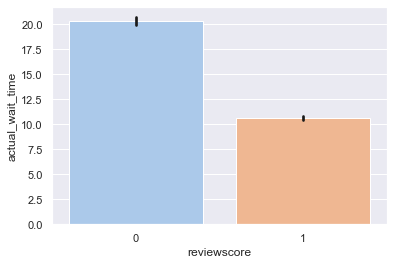

In [79]:
sb.barplot(x='reviewscore', y='actual_wait_time', data=sportsProd, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='reviewscore', ylabel='actualxestimated'>

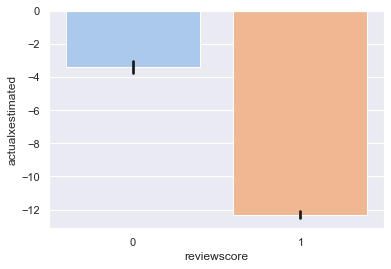

In [80]:
sb.barplot(x='reviewscore', y='actualxestimated', data=sportsProd, palette ="pastel" , errcolor='k')